In [ ]:
import numpy as np
import xarray as xr
import xroms 

z_r = np.load('/srv/scratch/z5297792/z_r.npy')          
z_r = np.transpose(z_r, (1, 2, 0))                    
dz  = np.diff(z_r, axis=2)                              
w   = np.abs(dz)                                       

fnumbers = [f'{num:05}' for num in range(1461, 10611+1, 30)]

for ii, fnum in enumerate(fnumbers):
    ds = xr.open_dataset(f'/srv/scratch/z3533156/26year_BRAN2020/outer_avg_{fnum}.nc')
    N2 = ds.xroms.N2.data                              
    ds.close()

    N2 = np.transpose(N2, (3, 2, 1, 0))                
    N2 = np.flip(N2, axis=2)    
    N2 = N2[:,:,1:-1,:]

    N  = np.where(N2 > 0, np.sqrt(N2), np.nan)         

    # broadcast weights (x, y, zmid) across time
    Nbar = np.nansum(N * w[..., None], axis=2) / np.nansum(w, axis=2)[..., None]  

    np.save('/srv/scratch/z5297792/Climatology/N2s/Nbar_'+str(fnum)+'.npy', Nbar)

    if ii % 10 == 0:
        print(fnum)
        

In [20]:
fnumbers = [f'{num:05}' for num in range(1461, 10611+1, 30)]

fnum = fnumbers[0]
ds = xr.open_dataset(f'/srv/scratch/z3533156/26year_BRAN2020/outer_avg_{fnum}.nc')
N2 = ds.xroms.N2.data                              
ds.close()

N2 = np.transpose(N2, (3, 2, 1, 0))                
N2 = np.flip(N2, axis=2)    
N2 = N2[:,:,1:,:]

H = 300

i, j, k = np.where((-z_r) > H)
N2[i, j, k, :] = np.nan

z_r_mask = z_r.copy()
z_r_mask[i, j, k] = np.nan
dz  = np.diff(z_r_mask, axis=2)                              
w   = np.abs(dz) 

N2 = N2[:,:,:-1,:]

N  = np.where(N2 > 0, np.sqrt(N2), np.nan)         

# broadcast weights (x, y, zmid) across time
Nbar = np.nansum(N * w[..., None], axis=2) / np.nansum(w, axis=2)[..., None]  


/scratch/pbs.6908117.kman.restech.unsw.edu.au/ipykernel_944694/4175510310.py:24: RuntimeWarning: invalid value encountered in sqrt
  N  = np.where(N2 > 0, np.sqrt(N2), np.nan)


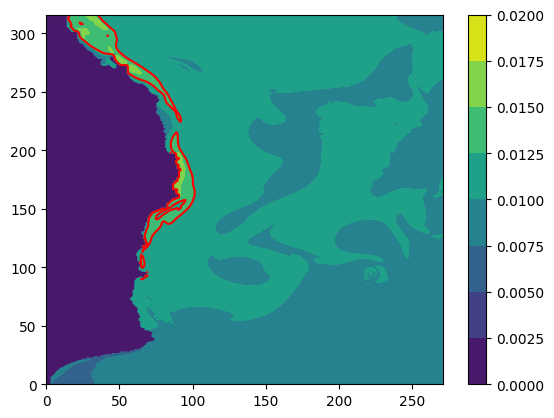

In [34]:
import matplotlib.pyplot as plt
plt.contourf(Nbar[:,:,0].T)
plt.colorbar()
plt.contour(Nbar[:,:,0].T, levels=[.0125], colors='r')



In [11]:
Nbar.shape

(272, 317, 30)